In [201]:
import numpy as np
import matplotlib.pyplot as plt
import random

Punto 1) simulación estocástica primitiva

In [ ]:
i_max = 300
n_max = 500
kr= 0.8
gammar= 0.02
kp = 0.1
gammap = 0.005
k=0.4
dt= 0.01
print(kr*dt)
print(gammar*dt)

0.008
0.0002


In [ ]:
def simulacion_estocastica(i_max,kr,gammar,kp,gammap):
  t = np.linspace(0,i_max*dt,i_max)
  r = np.zeros((i_max))
  p = np.zeros((i_max))
  for i in range(i_max):
    u= random.random()
    if u < kr:
      r[i]=r[i-1]+1
    if u < gammar*r[i-1]:
      r[i]=r[i-1]-1
    if u < kp*(kr/gammar):
      p[i]=p[i-1]+1
    if u < gammap*p[i-1]:
      p[i]=p[i-1]-1
  return t,r,p


In [ ]:
t,r,p = simulacion_estocastica(i_max,kr,gammar,kp,gammap)

Text(0.5, 0, 't')

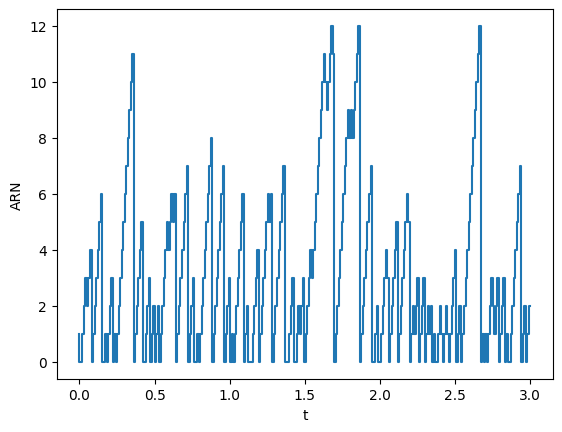

In [ ]:
plt.step(t,r)
plt.ylabel('ARN')
plt.xlabel('t')

Text(0.5, 0, 't')

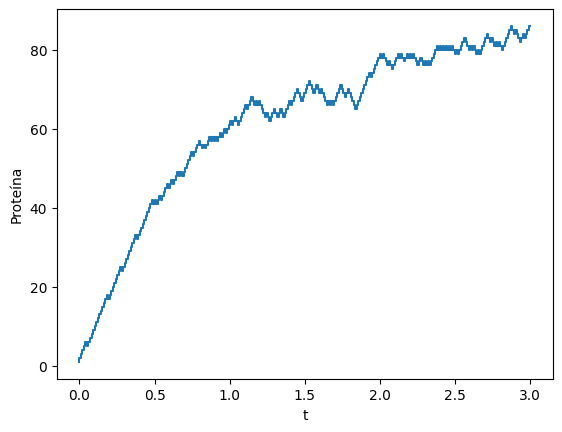

In [ ]:
plt.step(t,p)
plt.ylabel('Proteína')
plt.xlabel('t')

a)

In [ ]:
rn= np.zeros((i_max,n_max))
pn= np.zeros((i_max,n_max))


In [ ]:
def poblacion(f,i_max,n_max,kr,gammar,kp,gammap):
  dt= 1
  tf= np.arange(0,i_max,dt)
  fig, ax= plt.subplots(1, 2, figsize=(15,9))
  p0 = []
  r0 = []
  for n in range(1, n_max):
    t,r,p= f(i_max,kr,gammar,kp,gammap)
    p0.append(p)
    r0.append(r)
    ax[0].step(tf,r)
    ax[0].set_ylabel("ARN")
    ax[0].set_xlabel("Tiempo")
    ax[1].step(tf,p)

    ax[1].set_ylabel("Proteínas")
    ax[1].set_xlabel("Tiempo")

  plt.show()
  pn = np.vstack(p0)
  rn = np.vstack(r0)
  return tf,rn,pn

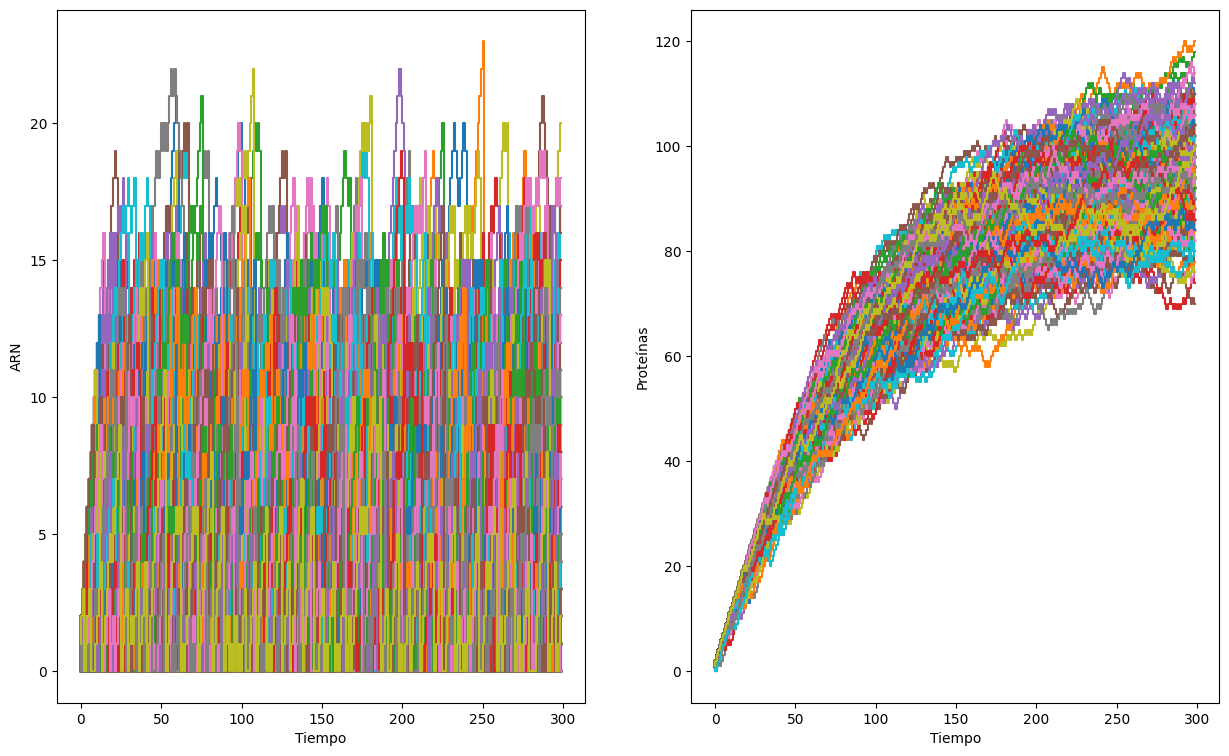

In [ ]:
tf,rn,pn = poblacion(simulacion_estocastica,i_max,n_max,kr,gammar,kp,gammap)

Text(0.5, 0, 'Tiempo')

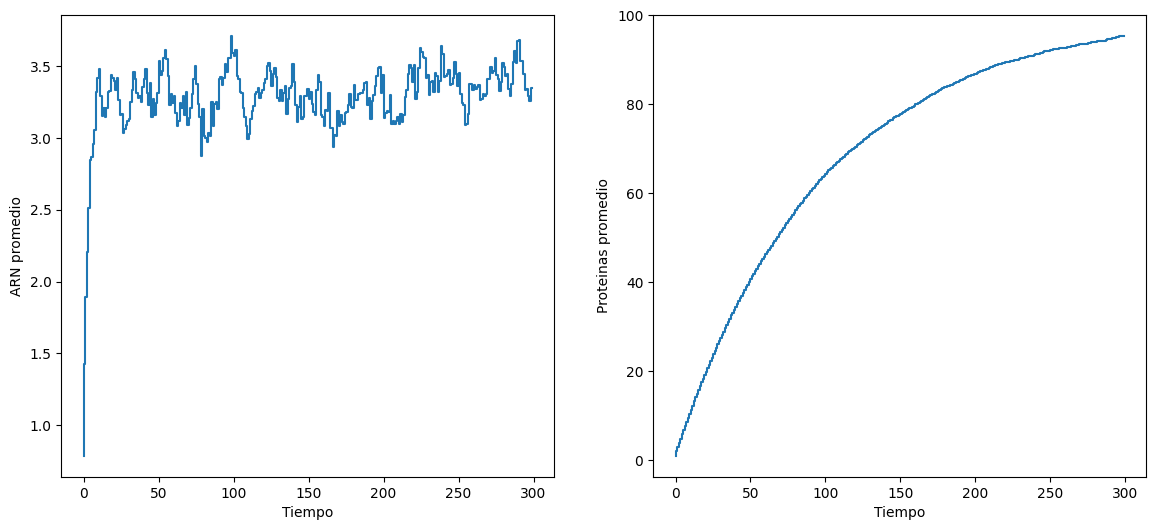

In [ ]:
p_p= np.mean(pn,axis=0)
p_r= np.mean(rn,axis=0)
fig, ax= plt.subplots(1, 2, figsize=(14, 6))
ax[0].step(tf,p_r)
ax[0].set_ylabel("ARN promedio")
ax[0].set_xlabel("Tiempo")
ax[1].step(tf,p_p)
ax[1].set_ylabel("Proteinas promedio")
ax[1].set_xlabel("Tiempo")

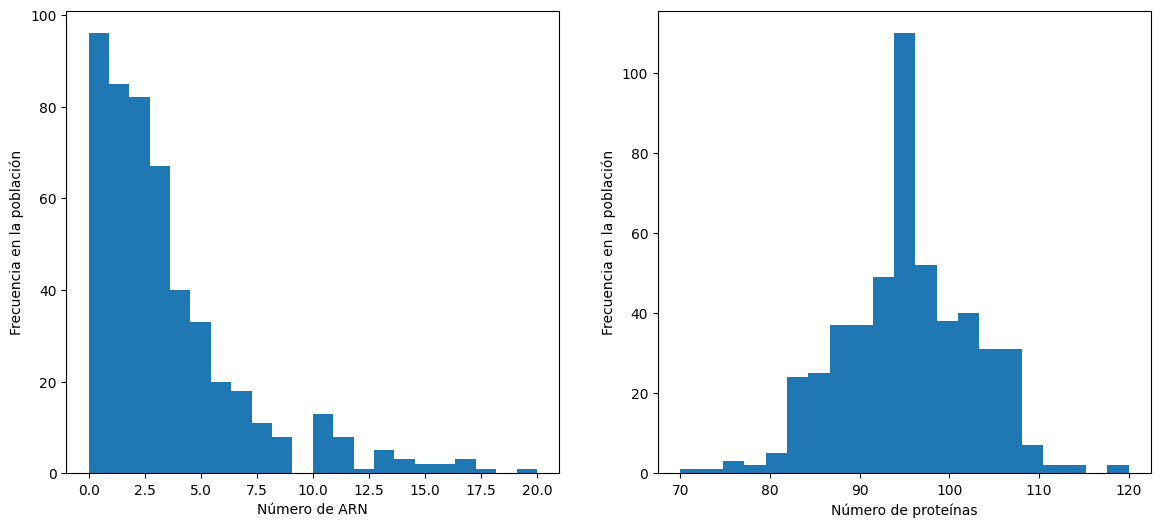

In [ ]:
fig, ax= plt.subplots(1, 2, figsize=(14, 6))
ax[0].hist(rn[:,299],bins=int(np.sqrt(n_max)))
ax[0].set_xlabel("Número de ARN")
ax[0].set_ylabel("Frecuencia en la población")
ax[1].hist(pn[:,299],bins=int(np.sqrt(n_max))-1)
ax[1].set_xlabel("Número de proteínas")
ax[1].set_ylabel("Frecuencia en la población")
plt.show()

d)

In [ ]:
def retroalimentacion_negativa(i_max,k,kr,gammar,kp,gammap):
  t = np.linspace(0,i_max*dt,i_max)
  r = np.zeros((i_max))
  p = np.zeros((i_max))
  for i in range(i_max):
    u= random.random()
    if u < kr/(1+(p[i-1]/k)**2):
      r[i]=r[i-1]+1
    if u < gammar*r[i-1]:
      r[i]=r[i-1]-1
    if u < kp*kr/(gammap*(1+(p[i-1]/k)**2)):
      p[i]=p[i-1]+1
    if u < gammap*p[i-1]:
      p[i]=p[i-1]-1
  return t,r,p

In [ ]:
t2,r2,p2 = retroalimentacion_negativa(i_max,k,kr,gammar,kp,gammap)

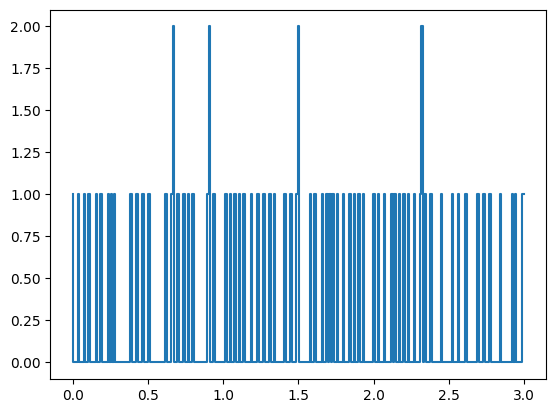

In [ ]:
plt.step(t2,r2)

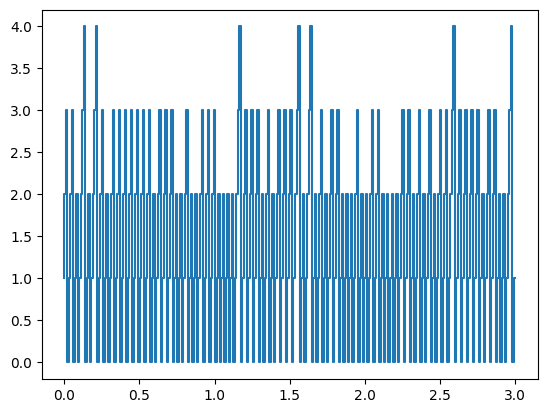

In [ ]:
plt.step(t2,p2)